In [25]:
import os
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import csv
from tensorflow.keras.utils import plot_model
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torchtext
import torch
from torch.nn import Linear
import itertools
import networkx as nx
import string
import nltk
import spacy
import random
from tqdm import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/My Drive/detected_output/

/content/drive/.shortcut-targets-by-id/1omDOLWYXWlYFk8IC1R1lYRoGswRXHfZg/detected_output


In [7]:
# The direction which includes the output tables for each image.
file_names = os.listdir()

In [8]:
count = 0
for i in file_names:
  if i[-3:] == 'csv':
    # print(i)
    count+=1
print(count)

798


In [9]:
# Calculate num_of_houses, sum_of_shape_area, sum_of_shape_length of each image.
dic = {'tract_id':[], 'house_num':[], 'shape_area':[], 'shape_length':[], 'shape_area_c':[], 'shape_length_c':[], 'target': []}
for file in file_names:
  if file[-3:] == 'csv':
    df = pd.read_csv(file) 
    dic['tract_id'].append(re.findall(r"\d+", file)[0])
    dic['house_num'].append(df.OID_.max())
    dic['shape_area'].append(df.Shape_Area.sum())
    dic['shape_length'].append(df.Shape_Length.sum())
    dic['shape_area_c'].append(sum(df.Shape_Area*df.Confidence/100))
    dic['shape_length_c'].append(sum(df.Shape_Length*df.Confidence/100))
    if file[:3] == 'poo':
      dic['target'].append(0)  
    elif file[:3] == 'gen':
      dic['target'].append(1)  
    elif file[:3] == 'adv':
      dic['target'].append(2)

In [10]:
df = pd.DataFrame(dic)
df

,tract_id,house_num,shape_area,shape_length,shape_area_c,shape_length_c,target
0,832400,779.0,2.228243e+06,154689.910422,2.040189e+06,141230.226156,2
1,832500,177.0,1.712526e+06,65381.669831,1.571339e+06,59466.536988,2
2,832600,192.0,1.542560e+06,62029.187004,1.418126e+06,56437.295050,2
3,832900,116.0,9.165843e+05,39755.607375,8.440270e+05,36175.309647,2
4,833000,106.0,3.059690e+06,72289.006236,2.786114e+06,65925.252918,2
...,...,...,...,...,...,...,...
793,831900,447.0,1.317559e+06,101141.433622,1.194704e+06,91186.471272,2
794,832000,213.0,1.536429e+06,70739.019693,1.391498e+06,63580.085051,2
795,832100,218.0,1.805965e+06,77444.712979,1.621782e+06,69571.020570,2
796,832200,405.0,1.110235e+06,86114.732169,1.009572e+06,77541.209972,2


In [ ]:
df.to_csv('object_detection.csv',index=False)

In [11]:
df

,tract_id,house_num,shape_area,shape_length,shape_area_c,shape_length_c,target
0,832400,779.0,2.228243e+06,154689.910422,2.040189e+06,141230.226156,2
1,832500,177.0,1.712526e+06,65381.669831,1.571339e+06,59466.536988,2
2,832600,192.0,1.542560e+06,62029.187004,1.418126e+06,56437.295050,2
3,832900,116.0,9.165843e+05,39755.607375,8.440270e+05,36175.309647,2
4,833000,106.0,3.059690e+06,72289.006236,2.786114e+06,65925.252918,2
...,...,...,...,...,...,...,...
793,831900,447.0,1.317559e+06,101141.433622,1.194704e+06,91186.471272,2
794,832000,213.0,1.536429e+06,70739.019693,1.391498e+06,63580.085051,2
795,832100,218.0,1.805965e+06,77444.712979,1.621782e+06,69571.020570,2
796,832200,405.0,1.110235e+06,86114.732169,1.009572e+06,77541.209972,2


In [14]:
%cd /content/drive/My Drive/Colab Notebooks/object_detection/

/content/drive/My Drive/Colab Notebooks/object_detection


In [15]:
df_3lables = pd.read_csv('object_detection.csv') 

In [16]:
df_3lables

,tract_id,house_num,shape_area,shape_length,shape_area_c,shape_length_c,target
0,832400,779.0,2.228243e+06,154689.910422,2.040189e+06,141230.226156,2
1,832500,177.0,1.712526e+06,65381.669831,1.571339e+06,59466.536988,2
2,832600,192.0,1.542560e+06,62029.187004,1.418126e+06,56437.295050,2
3,832900,116.0,9.165843e+05,39755.607375,8.440270e+05,36175.309647,2
4,833000,106.0,3.059690e+06,72289.006236,2.786114e+06,65925.252918,2
...,...,...,...,...,...,...,...
793,831900,447.0,1.317559e+06,101141.433622,1.194704e+06,91186.471272,2
794,832000,213.0,1.536429e+06,70739.019693,1.391498e+06,63580.085051,2
795,832100,218.0,1.805965e+06,77444.712979,1.621782e+06,69571.020570,2
796,832200,405.0,1.110235e+06,86114.732169,1.009572e+06,77541.209972,2


In [17]:
# Modify the 3 labels into 2 labels
df_3lables.loc[df_3lables['target']==2,'target']=0

In [18]:
df_3lables.loc[df_3lables['target']==0,].describe()

,tract_id,house_num,shape_area,shape_length,shape_area_c,shape_length_c,target
count,640.00000,639.000000,6.400000e+02,640.000000,6.400000e+02,640.000000,640.0
mean,387185.13750,551.369327,1.519131e+06,105101.477462,1.411505e+06,97741.296298,0.0
std,275943.20861,368.353527,6.291267e+05,52415.727393,5.888492e+05,49669.755329,0.0
min,10201.00000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0
25%,150401.75000,236.500000,1.145393e+06,67402.787744,1.054233e+06,62300.355907,0.0
50%,301801.50000,502.000000,1.532362e+06,100175.251913,1.418824e+06,92064.408083,0.0
75%,660301.25000,836.000000,1.911709e+06,144223.920412,1.788763e+06,135096.929934,0.0
max,843900.00000,1546.000000,4.993901e+06,246453.304842,4.604613e+06,233845.354257,0.0


In [19]:
df_3lables.loc[df_3lables['target']==1,].describe()

,tract_id,house_num,shape_area,shape_length,shape_area_c,shape_length_c,target
count,158.000000,158.000000,1.580000e+02,158.000000,1.580000e+02,158.000000,158.0
mean,471836.968354,446.424051,1.469531e+06,91790.556330,1.363020e+06,84954.044865,1.0
std,271662.169552,316.730939,6.923325e+05,49180.845274,6.471422e+05,46076.133062,0.0
min,10100.000000,4.000000,4.918555e+04,1710.224980,4.753573e+04,1632.842690,1.0
25%,242875.000000,177.750000,1.049954e+06,56199.219219,9.650188e+05,52217.157532,1.0
50%,460550.000000,396.000000,1.491829e+06,87574.892539,1.369158e+06,79800.817734,1.0
75%,710400.000000,652.500000,1.839927e+06,126990.912489,1.706581e+06,116404.930890,1.0
max,843500.000000,1408.000000,5.068800e+06,230415.455723,4.767410e+06,218683.643285,1.0


In [20]:
df_3lables.describe()

,tract_id,house_num,shape_area,shape_length,shape_area_c,shape_length_c,target
count,798.000000,797.000000,7.980000e+02,798.000000,7.980000e+02,798.000000,798.000000
mean,403945.775689,530.564617,1.509310e+06,102465.981799,1.401905e+06,95209.484611,0.197995
std,276995.736725,360.958669,6.419877e+05,52032.592786,6.007288e+05,49215.929829,0.398738
min,10100.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,160825.000000,224.000000,1.124318e+06,64190.545106,1.037574e+06,58460.991643,0.000000
50%,351250.000000,478.000000,1.527057e+06,98135.958240,1.416067e+06,90516.444853,0.000000
75%,670275.000000,796.000000,1.904823e+06,141807.066103,1.777529e+06,131492.603397,0.000000
max,843900.000000,1546.000000,5.068800e+06,246453.304842,4.767410e+06,233845.354257,1.000000


In [26]:
Counter(df_3lables.target)

Counter({0: 640, 1: 158})

In [27]:
# Keep the images with more than 30 houses.
df_3labels_modifiednum = df_3lables.loc[df_3lables.house_num>30,]

In [17]:
# df_3labels_modifiednum = df_3lables.loc[df_3lables.house_num>100,]

In [ ]:
# df_3labels_modifiednum.to_csv('3labels_modifiednum1.csv',index=False)

In [28]:
Counter(df_3labels_modifiednum.target)

Counter({0: 606, 1: 152})

In [29]:
df_2labels_modifiednum = df_3labels_modifiednum

In [30]:
Counter(df_2labels_modifiednum.target)

Counter({0: 606, 1: 152})

In [31]:
X_data_2labels_modifiednum = df_2labels_modifiednum[['house_num','shape_area','shape_length']]
y_data_2labels_modifiednum = df_2labels_modifiednum['target']
X_train_2labels_modifiednum, X_test_2labels_modifiednum, y_train_2labels_modifiednum, y_test_2labels_modifiednum = train_test_split(X_data_2labels_modifiednum,
                                                            y_data_2labels_modifiednum,
                                                            test_size=0.2,
                                                            random_state=42)

In [32]:
# PCA
def plot_pca(X, y, perplexity=30, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    pca = PCA(random_state=42,n_components=2)
    X_embedded = pca.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap,alpha=0.7)
    plt.title("PCA plot")
    plt.xticks()
    plt.yticks()

    plt.show()

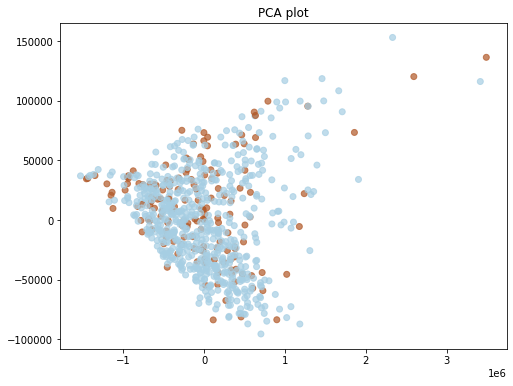

In [33]:
plot_pca(X_data_2labels_modifiednum, y_data_2labels_modifiednum, perplexity=50)

In [34]:
# tSNE
def plot_tsne(X, y, perplexity=30, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE(random_state=42)
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap,alpha=0.7)
    plt.title("tSNE plot")
    plt.xticks(())
    plt.yticks(())

    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


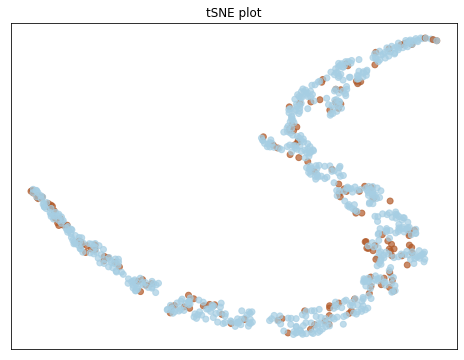

In [35]:
plot_tsne(X_data_2labels_modifiednum, y_data_2labels_modifiednum, perplexity=50)

## Keras model

In [36]:
from keras.models import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf
import numpy as np
import numpy as np

from os import path


import matplotlib.pyplot as plt

#scikit-learn related imports
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# pytorch relates imports
import torch
import torch.nn as nn
import torch.optim as optim

import torch.nn.functional as F

In [68]:
keras_model = Sequential()
keras_model.add(Dense(200, input_dim=3, activation='relu'))
layers.BatchNormalization(), # add batch_normalization layer
keras_model.add(Dense(200, activation='relu'))
keras_model.add(Dense(200, activation='relu'))
layers.BatchNormalization(), # add batch_normalization layer
keras_model.add(Dense(200, activation='relu'))
keras_model.add(Dense(200, activation='relu'))
keras_model.add(Dense(1, activation='sigmoid')) # since it is a binary task, we use sigmoid here.
keras_model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer="adam")

In [41]:
y_train_2labels_modifiednum

219    0
70     1
653    0
135    1
45     1
      ..
72     1
110    1
278    0
454    0
106    1
Name: target, Length: 606, dtype: int64

In [69]:
history = keras_model.fit(X_train_2labels_modifiednum, y_train_2labels_modifiednum, epochs=200)

Epoch 1/200
19/19 [==============================] - 1s 3ms/step - loss: 9633.2148 - accuracy: 0.7178
Epoch 2/200
19/19 [==============================] - 0s 3ms/step - loss: 1582.2120 - accuracy: 0.6518
Epoch 3/200
19/19 [==============================] - 0s 3ms/step - loss: 726.2224 - accuracy: 0.6799
Epoch 4/200
19/19 [==============================] - 0s 3ms/step - loss: 469.9460 - accuracy: 0.6947
Epoch 5/200
19/19 [==============================] - 0s 3ms/step - loss: 720.5345 - accuracy: 0.6700
Epoch 6/200
19/19 [==============================] - 0s 3ms/step - loss: 744.4142 - accuracy: 0.7079
Epoch 7/200
19/19 [==============================] - 0s 3ms/step - loss: 743.1093 - accuracy: 0.6650
Epoch 8/200
19/19 [==============================] - 0s 3ms/step - loss: 644.3594 - accuracy: 0.6947
Epoch 9/200
19/19 [==============================] - 0s 3ms/step - loss: 515.4426 - accuracy: 0.7096
Epoch 10/200
19/19 [==============================] - 0s 3ms/step - loss: 741.4274 - accu

In [57]:
Counter(y_train_2labels_modifiednum)

Counter({0: 487, 1: 119})

In [45]:
1-119/(487+119)

0.8036303630363036

In [70]:
preds = keras_model.predict(X_test_2labels_modifiednum)

In [71]:
X_test_2labels_modifiednum

,house_num,shape_area,shape_length
615,545.0,1.196177e+06,101480.433975
101,933.0,1.917866e+06,166968.946616
290,670.0,1.272731e+06,120103.525399
688,167.0,1.582922e+06,64566.892177
606,406.0,1.124294e+06,78300.838571
...,...,...,...
220,627.0,2.571029e+06,124060.991250
398,1234.0,1.737919e+06,185623.340189
375,521.0,2.177210e+06,96231.145474
94,341.0,9.102258e+05,66115.652937


In [73]:
preds[preds<=0.5]=0
preds[preds>0.5]=1

In [74]:
sklearn.metrics.accuracy_score(y_test_2labels_modifiednum, preds)

0.7828947368421053

In [75]:
Counter(y_test_2labels_modifiednum)

Counter({0: 119, 1: 33})

In [77]:
1-33/(33+119)

0.7828947368421053

## Random forest

In [78]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_2labels_modifiednum, y_train_2labels_modifiednum)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [79]:
print("Accuracy Score:",classifier.score(X_test_2labels_modifiednum, y_test_2labels_modifiednum))

Accuracy Score: 0.756578947368421


In [82]:
Counter(y_test_2labels_modifiednum)

Counter({0: 119, 1: 33})

In [5]:
1-33/(33+119)

0.7828947368421053

In [80]:
from sklearn.metrics import classification_report

In [81]:
y_pred = classifier.predict(X_test_2labels_modifiednum)
print(classification_report(y_test_2labels_modifiednum, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       119
           1       0.33      0.12      0.18        33

    accuracy                           0.76       152
   macro avg       0.56      0.53      0.52       152
weighted avg       0.69      0.76      0.71       152



## Tabular model

In [83]:
df_2labels_modifiednum_int = df_2labels_modifiednum[['house_num','shape_area','shape_length','target']]

In [84]:
df_2labels_modifiednum_int['shape_length'] = df_2labels_modifiednum_int['shape_length'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_2labels_modifiednum_int['shape_area'] = df_2labels_modifiednum_int['shape_area'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
df_2labels_modifiednum_int['house_num'] = df_2labels_modifiednum_int['house_num'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_2labels_modifiednum_int

,house_num,shape_area,shape_length,target
0,779,2228243,154689,0
1,177,1712525,65381,0
2,192,1542560,62029,0
3,116,916584,39755,0
4,106,3059689,72289,0
...,...,...,...,...
793,447,1317559,101141,0
794,213,1536428,70739,0
795,218,1805965,77444,0
796,405,1110234,86114,0


In [107]:
# train, test split
train_splits = []
test_splits = []

for _, group_data in df_2labels_modifiednum_int.groupby("target"):
    random_selection = np.random.rand(len(group_data.index)) <= 0.85
    train_splits.append(group_data[random_selection])
    test_splits.append(group_data[~random_selection])

train_data = pd.concat(train_splits).sample(frac=1).reset_index(drop=True)
test_data = pd.concat(test_splits).sample(frac=1).reset_index(drop=True)

print(f"Train split size: {len(train_data.index)}")
print(f"Test split size: {len(test_data.index)}")

train_data_file = "train_data_2labels_modifiednum_int.csv"
test_data_file = "test_data_2labels_modifiednum_int.csv"

train_data.to_csv(train_data_file, index=False)
test_data.to_csv(test_data_file, index=False)

Train split size: 637
Test split size: 121


In [113]:
import copy

In [114]:
CSV_HEADER = list(df_2labels_modifiednum_int.columns)

TARGET_FEATURE_NAME = "target"

TARGET_FEATURE_LABELS = [0, 1]

FEATURE_NAMES = copy.deepcopy(CSV_HEADER)
FEATURE_NAMES.remove(TARGET_FEATURE_NAME)

COLUMN_DEFAULTS = [
    [0] if feature_name in FEATURE_NAMES + [TARGET_FEATURE_NAME] else ["NA"]
    for feature_name in CSV_HEADER
]

NUM_CLASSES = len(TARGET_FEATURE_LABELS)

In [115]:
def get_dataset_from_csv(csv_file_path, batch_size, shuffle=False):

    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=CSV_HEADER,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=True,
        shuffle=shuffle,
    )
    return dataset.cache()



learning_rate = 0.001
dropout_rate = 0.1
batch_size = 265
num_epochs = 50

hidden_units = [50, 50]


def run_experiment(model):

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )

    train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)

    test_dataset = get_dataset_from_csv(test_data_file, batch_size)

    print("Start training the model...")
    history = model.fit(train_dataset, epochs=num_epochs)
    print("Model training finished")

    _, accuracy = model.evaluate(test_dataset, verbose=0)

    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

In [116]:
train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)
train_dataset

<CacheDataset element_spec=(OrderedDict([('house_num', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('shape_area', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('shape_length', TensorSpec(shape=(None,), dtype=tf.int32, name=None))]), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [72]:
Counter(test_data.target)

Counter({0: 95, 1: 24})

In [110]:
1-24/(24+95)

0.7983193277310925

In [118]:
#create input
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        inputs[feature_name] = layers.Input(
            name=feature_name, shape=(), dtype=tf.float32
        )
    return inputs

In [119]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import csv
from tensorflow.keras.utils import plot_model
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torchtext
import torch
from torch.nn import Linear
import itertools
import networkx as nx
import string
import nltk
import spacy
import random
from tqdm import tqdm

In [120]:
#encode features

from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_inputs(inputs, use_embedding=False):
    encoded_features = []
    for feature_name in inputs:
        encoded_feature = tf.expand_dims(inputs[feature_name], -1)

        encoded_features.append(encoded_feature)

    all_features = layers.concatenate(encoded_features)
    return all_features

In [121]:
from tensorflow.keras.utils import plot_model

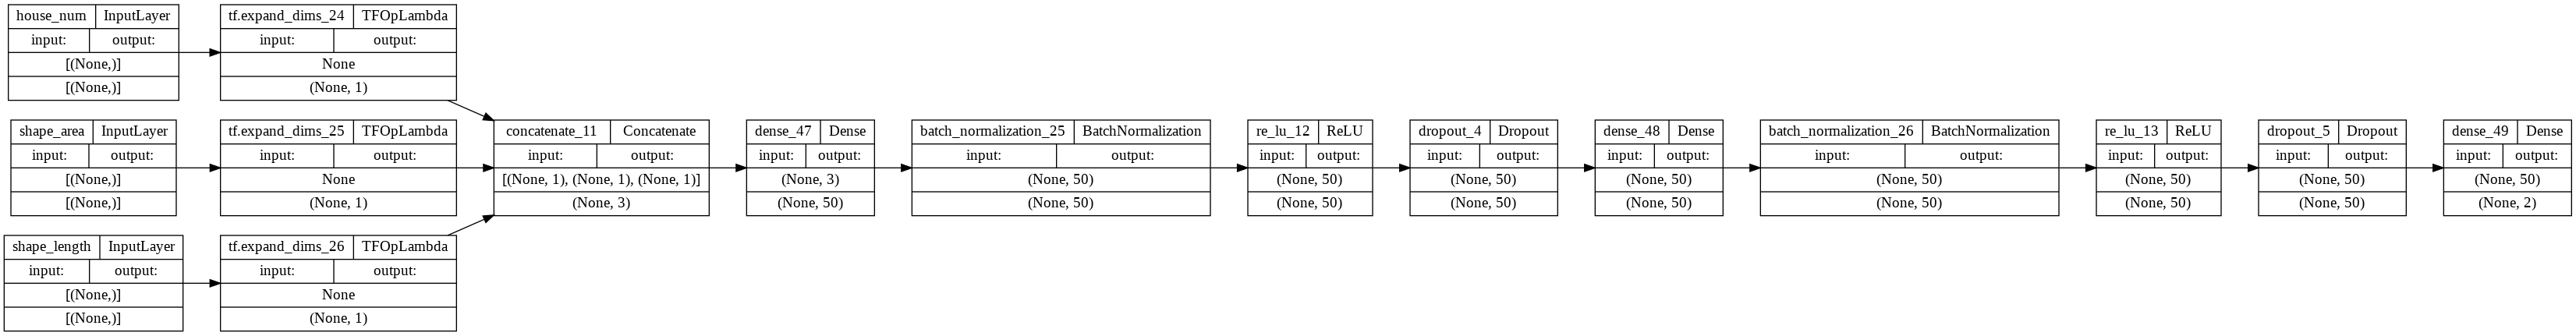

In [122]:
#baseline model

def create_baseline_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)
    for units in hidden_units:
        features = layers.Dense(units)(features)
        features = layers.BatchNormalization()(features)
        features = layers.ReLU()(features)
        features = layers.Dropout(dropout_rate)(features)

    outputs = layers.Dense(units=NUM_CLASSES, activation="sigmoid")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


baseline_model = create_baseline_model()
plot_model(baseline_model, show_shapes=True, rankdir="LR")

In [112]:
run_experiment(baseline_model)

Start training the model...
Epoch 1/50
3/3 [==============================] - 1s 27ms/step - loss: 0.9609 - sparse_categorical_accuracy: 0.3689
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 0.8621 - sparse_categorical_accuracy: 0.4270
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 0.8089 - sparse_categorical_accuracy: 0.4411
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 0.7411 - sparse_categorical_accuracy: 0.5071
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6974 - sparse_categorical_accuracy: 0.5651
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6521 - sparse_categorical_accuracy: 0.5965
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6443 - sparse_categorical_accuracy: 0.6374
Epoch 8/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6213 - sparse_categorical_accuracy: 0.6923
Epoch 9/50
3/3 [==============================] - 0

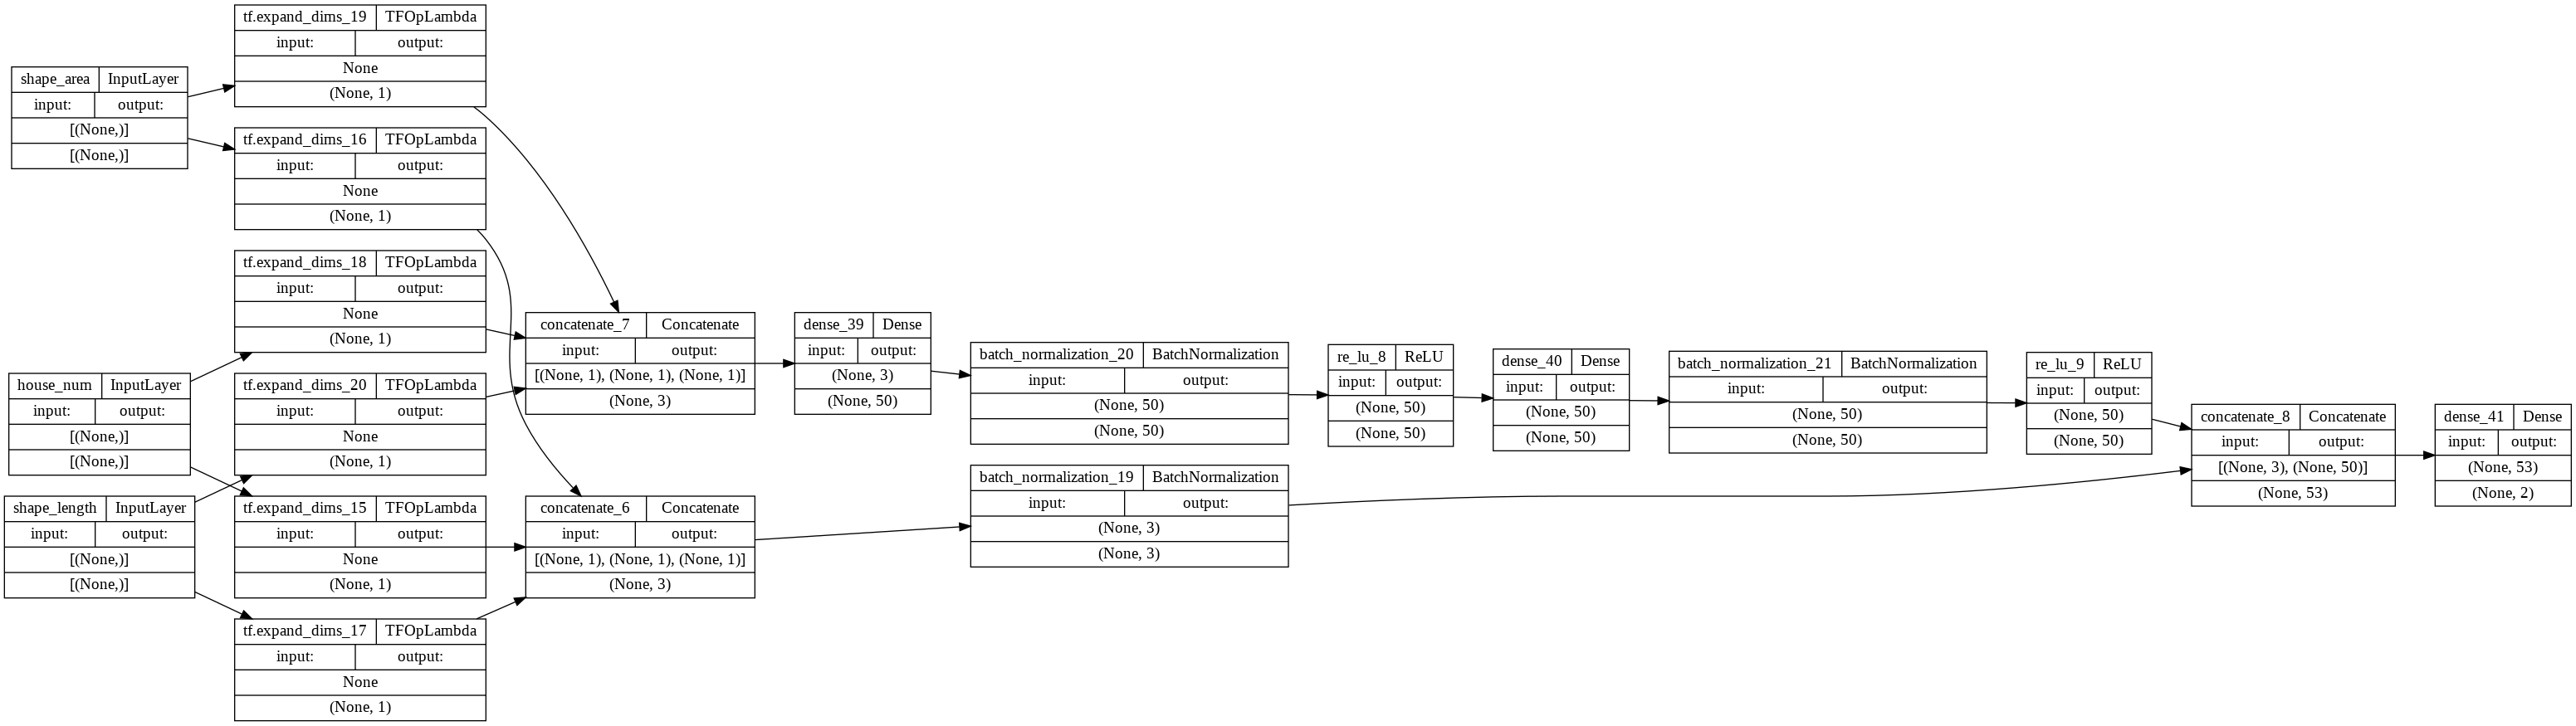

In [106]:
#wide and deep
def create_wide_and_deep_model():

    inputs = create_model_inputs()
    wide = encode_inputs(inputs)
    wide = layers.BatchNormalization()(wide)

    deep = encode_inputs(inputs, use_embedding=True)
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        # deep = layers.Dropout(dropout_rate)(deep)

    merged = layers.concatenate([wide, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="sigmoid")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


wide_and_deep_model = create_wide_and_deep_model()
keras.utils.plot_model(wide_and_deep_model, show_shapes=True, rankdir="LR")

In [107]:
run_experiment(wide_and_deep_model)

Start training the model...
Epoch 1/50
3/3 [==============================] - 1s 56ms/step - loss: 0.6428 - sparse_categorical_accuracy: 0.6053
Epoch 2/50
3/3 [==============================] - 0s 10ms/step - loss: 0.5861 - sparse_categorical_accuracy: 0.7461
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 0.5675 - sparse_categorical_accuracy: 0.7523
Epoch 4/50
3/3 [==============================] - 0s 9ms/step - loss: 0.5499 - sparse_categorical_accuracy: 0.7833
Epoch 5/50
3/3 [==============================] - 0s 8ms/step - loss: 0.5345 - sparse_categorical_accuracy: 0.7957
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.5243 - sparse_categorical_accuracy: 0.7972
Epoch 7/50
3/3 [==============================] - 0s 9ms/step - loss: 0.5166 - sparse_categorical_accuracy: 0.7972
Epoch 8/50
3/3 [==============================] - 0s 9ms/step - loss: 0.5117 - sparse_categorical_accuracy: 0.7957
Epoch 9/50
3/3 [==============================] - 

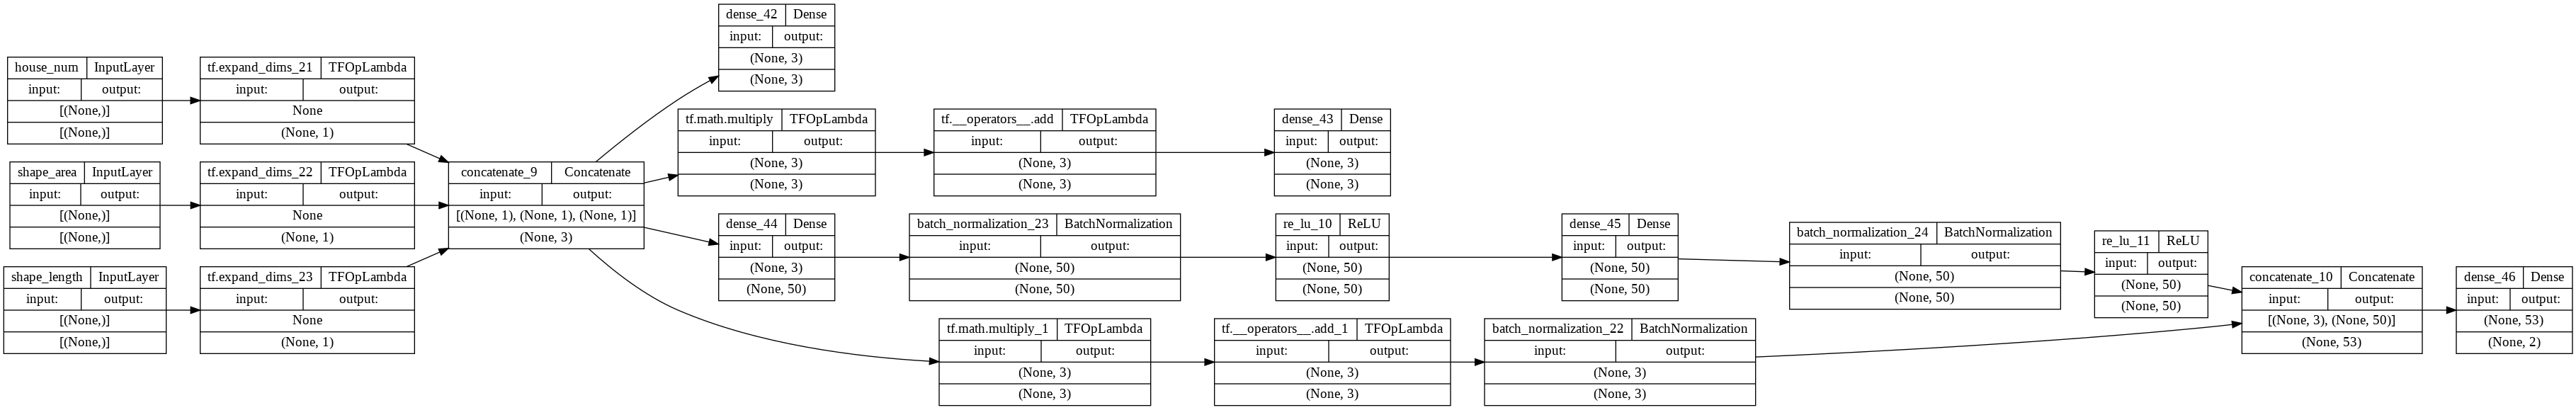

In [108]:
def create_deep_and_cross_model():

    inputs = create_model_inputs()
    x0 = encode_inputs(inputs, use_embedding=True)

    cross = x0
    for _ in hidden_units:
        units = cross.shape[-1]
        x = layers.Dense(units)(cross)
        cross = x0 * x + cross
    cross = layers.BatchNormalization()(cross)

    deep = x0
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        # deep = layers.Dropout(dropout_rate)(deep)

    merged = layers.concatenate([cross, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


deep_and_cross_model = create_deep_and_cross_model()
keras.utils.plot_model(deep_and_cross_model, show_shapes=True, rankdir="LR")

In [109]:
run_experiment(deep_and_cross_model)

Start training the model...
Epoch 1/50
3/3 [==============================] - 1s 52ms/step - loss: 0.6424 - sparse_categorical_accuracy: 0.6796
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.5629 - sparse_categorical_accuracy: 0.7678
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 0.5465 - sparse_categorical_accuracy: 0.7817
Epoch 4/50
3/3 [==============================] - 0s 9ms/step - loss: 0.5223 - sparse_categorical_accuracy: 0.7941
Epoch 5/50
3/3 [==============================] - 0s 10ms/step - loss: 0.5119 - sparse_categorical_accuracy: 0.7972
Epoch 6/50
3/3 [==============================] - 0s 10ms/step - loss: 0.5060 - sparse_categorical_accuracy: 0.7988
Epoch 7/50
3/3 [==============================] - 0s 12ms/step - loss: 0.4988 - sparse_categorical_accuracy: 0.7972
Epoch 8/50
3/3 [==============================] - 0s 9ms/step - loss: 0.4946 - sparse_categorical_accuracy: 0.7972
Epoch 9/50
3/3 [==============================] 